In [2]:
import json
import tweepy
import time
from tweepy import OAuthHandler


consumer_key = '*******************************'
consumer_secret = '*******************************'
access_token = '*******************************'
access_token_secret = '*******************************'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=3, retry_delay=60)

In [3]:

# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('ID: ' + str(user.id))
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: uzay00
ID: 14519511
Location: 
Friends: 404


In [4]:
user = api.get_user('kadirakgulll')

print('Name: ' + user.name)
print('ID: ' + str(user.id))
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Kadir
ID: 2332464662
Location: Türkiye
Friends: 143


In [5]:
user.description

'Burayı okuyan kaldı mı ?'

In [6]:
user.created_at

datetime.datetime(2014, 2, 7, 22, 2, 54)

In [10]:
# To print out the last 20 tweets by @VeriDefteri

VeriDefteri_tweets = api.user_timeline('kadirakgulll')
for tweet in VeriDefteri_tweets:
    print( tweet.created_at, tweet.text)

2018-10-12 06:26:34 RT @ProfDemirtas: Geri kalmış ülkelere: GEÇMİŞ OLSUN https://t.co/jfDZwzYFqB
2018-10-11 21:48:11 RT @ckucukozmen: Dünyanın ilk enflasyon polisi bizde. Ama haberi sunanlar neye gülüyor anlamadım. https://t.co/4a4WIUObWL
2018-10-11 15:08:18 RT @coolstuffcheap: HDMI https://t.co/ZIW1Mtdp9U
2018-10-10 20:52:31 -Knock Knock
-Who's there?
-Let the devil in
-What?
 Eminem - Venom https://t.co/npjZ5DmX34 @YouTube aracılığıyla
2018-10-10 20:04:10 RT @educatedear: Arda’nın tüm bunlara rağmen 5-10 sene sonra, belki çok daha yakın, bu ülkede teknik direktör, sportif direktör falan olaca…
2018-10-09 22:09:56 RT @ozgurugzo: ben izlerken ruhumu teslim ettim neyine gülüyosunuz acaba ya https://t.co/D9IhtfNwBS
2018-10-09 17:13:51 RT @ASRomaEN: International football is important but club football is importanter
2018-10-08 17:04:54 RT @canwaves: keşke Servet-i Fünun dönemine geri dönebilseydik ya https://t.co/jUArFBQ890
2018-10-07 15:35:36 RT @siyasifenomen: Siyasetçilerin, eşlerini 

In [12]:
tweet.text

'RT @kul0s: narkotik uyuma https://t.co/72WMOLy4Zy'

In [16]:
tweet.author.id

2332464662

In [22]:
tweet.favorited

False

In [23]:
#Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

RT @cagrimbakirci: @teslajnr @MeteAtature İnsanlar gerçek hayatta karşılaşsalar insanlara yapamayacakları şeyleri internette yapabiliyorlar…
RT @deaneckles: How are biological and social contagion affected by changes to network structure? Recent work has claimed a "weakness of lo…
"Hey onbeşli onbeşli" ağıtını düğünlerde göbek havası olarak çalmakta sorun yokmuş, ama Çav Bella ile kalça kıvırma… https://t.co/jzLs3ypmaW
İçişleri Bakanlığı, yolcuyu mağdur eden taksici sorununa el koydu https://t.co/Gd54MHvaa0
UK to cut hybrid car subsidies https://t.co/pkfuc0Hu59
@say_cem @BahaOkar @NalanMahsereci @BilimveGelecek Odanıza gelip bizzat imzalatabiliyor muyuz hocam?  :)
Graphics processing units that were designed to make video games look better are now being deployed to power everyt… https://t.co/pEuIp1v5DL
Have you ever wondered what would happen if a drone hit an airplane wing? Researchers at the University of Dayton t… https://t.co/qIGvFyiK02
How to set up your home Wi-Fi https://t.co/5D

In [24]:
# tweet = api.update_status('Made with Tweepy yeah!')

In [25]:
def get_friends(user_id):
    users = []
    page_count = 0
    for user in tweepy.Cursor(api.friends, id=user_id, count=10).pages():
        page_count += 1
        print ('Getting page {} for friends'.format(page_count))
        users.extend(user)
    return users

In [26]:
friends = get_friends(user.id)

Getting page 1 for friends
Getting page 2 for friends
Getting page 3 for friends
Getting page 4 for friends
Getting page 5 for friends
Getting page 6 for friends
Getting page 7 for friends
Getting page 8 for friends
Getting page 9 for friends
Getting page 10 for friends
Getting page 11 for friends
Getting page 12 for friends
Getting page 13 for friends
Getting page 14 for friends
Getting page 15 for friends


In [30]:
for f in friends:
    # print(f._json['name'], f._json['id'])
    pass

Source:
 - https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

In [35]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console

        consumer_key = '*******************************'
        consumer_secret = '*******************************'
        access_token = '*******************************'
        access_token_secret = '*******************************'
        
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

In [36]:
def main(query = 'Donald Trump', count = 10):
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query, count)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage:")
    print(100*len(ptweets)/len(tweets))
    
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage:")
    print(100*len(ntweets)/len(tweets))
    
    # percentage of neutral tweets
    print("Neutral tweets percentage:")
    print(100 - 100*len(ntweets)/len(tweets) - 100*len(ptweets)/len(tweets))
 
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])

In [39]:
main(query = 'deep learning', count = 100)

Positive tweets percentage:
22.727272727272727
Negative tweets percentage:
9.090909090909092
Neutral tweets percentage:
68.18181818181819


Positive tweets:
RT @math_rachel: Is your company interested in sponsoring diversity fellowships for our upcoming Practical Deep Learning for Coders course…
RT @DataScienceNIG: Dr. Abiodun Modupe kick-started the session on "Deep Learning for Natural Language Processing ( NLP)" by laying a good…
RT @SwissCognitive: Real World Application of Multi-Agent Deep Reinforcement Learning: Autonomous Traffic Flow Management at GTC Europe 201…
I’ve just come up with a great idea for the application of AI and Deep Learning to what currently appears to be an… https://t.co/pf9MHK1TVj
Humans will take forever just to get a single information while these AI will only take minutes. As we become more… https://t.co/ZvZtAy10bS
A new developmental reinforcement learning approach for sensorimotor space enlargement https://t.co/yUFMRH57wL
Real World Application of Multi

In [56]:
# empty list to store parsed tweets
tweets = []
fetched_tweets = api.search(q = 'CMPE 251', count = 10)
# parsing tweets one by one
for tweet in fetched_tweets:
    tweets.append((tweet.id_str, tweet.author.id_str, tweet.author.name , tweet.text))

In [57]:
tweets

[('1050652767985913856',
  '1585577172',
  'Enes Gül',
  'Cmpe 251 falan filan intermilan'),
 ('1050652749417738243',
  '338222489',
  'Hasan Kemik',
  'CMPE 251, course tryout!'),
 ('1050652697097990144', '2332464662', 'Kadir', 'CMPE 251 data science ?!'),
 ('1050652682220797953',
  '318510807',
  'Selin Yeşilselve',
  'Cmpe 251 is a great lesson!!!'),
 ('1050652679997779969', '14519511', 'uzay00', 'CMPE 251 is fun!! haha'),
 ('1050652671361728512', '217888241', 'Bartu Işıklar', 'CMPE 251 is not fun')]

In [46]:
tweets[-1]

'CMPE 251 is not fun'

In [ ]:
user = api.get_user('kadirakgulll')

print('Name: ' + user.name)
print('ID: ' + str(user.id))
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

# Gender Detection

In [60]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#from sklearn_pandas import DataFrameMapper # Notice that this is actually Sklearn-Pandas library
%matplotlib inline

# %% import twitter data
data = pd.read_csv("Week2-gender-classification/gender-classifier.csv",encoding = "latin1")
data.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


In [61]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [64]:
data.description.tail(20)

20030    Crowdsourcing #Innovation! The FINND connects ...
20031                                                  NaN
20032    Amicable IT person. Self indulgent writer. Som...
20033    cis (she/her)/18/volleyball enthusiast/ i art ...
20034    Where Raleigh's dynamic leaders come to connec...
20035    25. love my friends & family. the color pink. ...
20036    13 // snapchat: sianfreya.xÏ¬ @caitlin_zz_...
20037    Typographer and typographic consultant, co-fou...
20038    The FUN site for Animal Lovers - Get the lates...
20039            You can find me where the wild things are
20040    Houston Chronicle Columnist  - ken.hoffman@chr...
20041    When families go through divorce, it's helpful...
20042    Reviews of delectable #food, picturesque #trav...
20043    Head Chef, Chez Bruce. Loves Cars and Bicycles...
20044                         I Love Me...Myself....&....I
20045                                                 (rp)
20046    Whatever you like, it's not a problem at all. .

In [65]:
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [66]:
# Drop unnecessary columns/features
data.drop (columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_count',
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'], inplace = True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text                     20050 non-null object
dtypes: bool(1), float64(2), int64(3), object(10)
memory usage: 2.3+ MB


In [72]:
data.text[5]

'Ive seen people on the train with lamps, chairs, tvs etc  https://t.co/w6zf4pVM4I'

In [73]:
data['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [75]:
id_unknown = data[data['gender'] == 'unknown'].index
data = data.drop(index = id_unknown)

data['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [76]:
data['profile_yn'].value_counts()

yes    18836
no        97
Name: profile_yn, dtype: int64

In [77]:
drop_items_idx = data[data['profile_yn'] == 'no'].index
data.drop (index = drop_items_idx, inplace = True)
print (data['profile_yn'].value_counts())

data.drop (columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'], inplace = True)

yes    18836
Name: profile_yn, dtype: int64


In [78]:
data

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,description,fav_number,gender_gold,link_color,name,retweet_count,sidebar_color,text
0,False,finalized,3,male,1.0000,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,False,finalized,3,male,1.0000,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...
2,False,finalized,3,male,0.6625,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...
3,False,finalized,3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,False,finalized,3,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...
5,False,finalized,3,female,1.0000,you don't know me.,3901,NaN,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair..."
6,False,finalized,3,brand,1.0000,"A global marketplace for images, videos and mu...",4122,NaN,298AAE,Shutterstock,0,0,@BpackEngineer Thank you for your patience whi...
7,False,finalized,3,male,1.0000,The secret of getting ahead is getting started.,80,NaN,0000FF,RobinMeske,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...
8,False,finalized,3,female,1.0000,Pll Fan // Crazy about MCD // Ramen is bae,1825,NaN,9266CC,pigzilla_,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,False,finalized,3,female,1.0000,"Renaissance art historian, University of Notti...",3115,NaN,9266CC,GabrieleNeher,0,FFFFFF,@Evielady just how lovely is the tree this yea...


In [79]:
# Double check the data 
print (data['gender'].value_counts())

print ('---------------------------')
data.info()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 13 columns):
_golden               18836 non-null bool
_unit_state           18836 non-null object
_trusted_judgments    18836 non-null int64
gender                18836 non-null object
gender:confidence     18836 non-null float64
description           15522 non-null object
fav_number            18836 non-null int64
gender_gold           50 non-null object
link_color            18836 non-null object
name                  18836 non-null object
retweet_count         18836 non-null int64
sidebar_color         18836 non-null object
text                  18836 non-null object
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 1.9+ MB


In [80]:
print ('Full data items: ', data.shape)
print ('Data with label-confidence < 100%: ', data[data['gender:confidence'] < 1].shape)

Full data items:  (18836, 13)
Data with label-confidence < 100%:  (5032, 13)


In [81]:
drop_items_idx = data[data['gender:confidence'] < 1].index

data.drop (index = drop_items_idx, inplace = True)

print (data['gender:confidence'].value_counts())

data.drop (columns = ['gender:confidence'], inplace = True)

1.0    13804
Name: gender:confidence, dtype: int64


In [82]:
data.drop (columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)

# Double check the data 
print (data['gender'].value_counts())

print ('---------------------------')
data.info()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 8 columns):
gender           13804 non-null object
description      11773 non-null object
fav_number       13804 non-null int64
link_color       13804 non-null object
name             13804 non-null object
retweet_count    13804 non-null int64
sidebar_color    13804 non-null object
text             13804 non-null object
dtypes: int64(2), object(6)
memory usage: 970.6+ KB


In [83]:
from collections import Counter

twit_vocab = Counter()
for twit in data['text']:
    for word in twit.split(' '):
        twit_vocab[word] += 1

In [84]:
twit_vocab.most_common(20)

[('the', 8370),
 ('and', 7964),
 ('to', 4196),
 ('I', 3229),
 ('a', 3064),
 ('of', 2741),
 ('in', 2270),
 ('you', 2173),
 ('for', 2157),
 ('The', 2018),
 ('is', 1878),
 ('on', 1621),
 ('my', 1362),
 ('it', 1205),
 ('', 1184),
 ('with', 1156),
 ('Weather', 1074),
 ('that', 1032),
 ('from', 1022),
 ('me', 1001)]

In [86]:
tweet = "uzay geldi buraya W"
tweet.split(' ')

['uzay', 'geldi', 'buraya', 'W']

In [92]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [93]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

print(preprocessor('This!!@ twit :) is <b>nice</b>'))

this twit is nice :)


In [94]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


In [95]:
data['gender'].value_counts()

female    5367
male      4653
brand     3784
Name: gender, dtype: int64

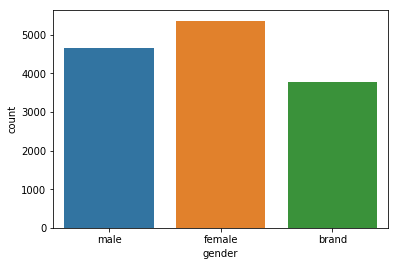

In [96]:
sns.countplot(data['gender'],label="Gender")

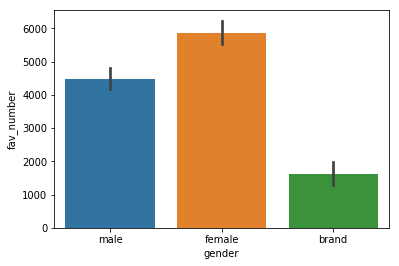

In [97]:
sns.barplot (x = 'gender', y = 'fav_number',data = data)

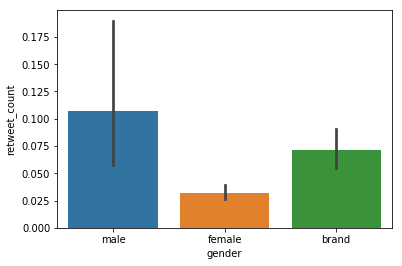

In [98]:
sns.barplot (x = 'gender', y = 'retweet_count',data = data)